In [4]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import minimize
from PlotSettings import MainColor1, MainColor2, MainColor3, BackgroundColor1, BackgroundColor2, BackgroundColor3, Gray1, Gray2, plt

alphaDM = 0.01


############## Functions ###############
def sigmatransfer(V, mphi, mchi, alphax):
    w = 300 * (mphi / 10) * (10 / mchi)
    st = (275.73) * (alphax / 1e-2) ** 2 * (mchi / 10) * (10 / mphi) ** (4)
    sv = 2 * st * (w ** 4 / V ** 4) * (2 * np.log(1.0 + V ** 2 / (2 * w ** 2)) - np.log(1.0 + V ** 2 / (w ** 2)))
    return sv


def sigmaviscosity(V, mphi, mchi, alphax):
    w  = 300*(mphi / 10) * (10 / mchi)
    beta = V/w
    st = (275.73)*(alphax/1e-2)**2*(mchi/10)*(10/ mphi)**(4)

    if beta < 0.01:
        sv = 2/2*st
    else:
        sv = 6*st*(1/beta**6)*( (2+beta**2)*np.log(1+ beta**2)- 2*beta**2 )
    return sv


def Integrand_sigmatransfer(v, v0, M, m, alphax):
    return sigmatransfer(v, M, m, alphax)*v*np.exp(-0.5*v**2/v0**2)*v**2


def Integrand_sigmaviscosity(v, v0, M, m, alphax):
    return sigmaviscosity(v, M, m, alphax)*v*np.exp(-0.5*v**2/v0**2)*v**2


def Average_sigmatransfer(v0, M, m, alphax):
    sigma2_MB = v0**2*(3*np.pi - 8)
    vmax = 2*np.sqrt(sigma2_MB)

    Prefactor = 4*np.pi/((2*np.pi*v0**2)**1.5 )
    Integral = quad(Integrand_sigmatransfer, 0., vmax, args=(v0, M, m, alphax))[0]
    return Prefactor*Integral

def Average_sigmaviscosity(v0, M, m, alphax):
    sigma2_MB = v0**2*(3*np.pi - 8)
    vmax = 2*np.sqrt(sigma2_MB)

    Prefactor = 4*np.pi/((2*np.pi*v0**2)**1.5 )
    Integral = quad(Integrand_sigmaviscosity, 0., vmax, args=(v0, M, m, alphax))[0]
    return Prefactor*Integral


############## Camila Data ###############

CamilaData_Fig7 = np.loadtxt('Data-Sets/Data_Fig7_Correa_2021.txt')
VelocityData = CamilaData_Fig7[:,0]
Velocity_16_Percentile = CamilaData_Fig7[:,1]
Velocity_84_Percentile = CamilaData_Fig7[:,2]
VelocityData_Err = ( (VelocityData - Velocity_16_Percentile) + (Velocity_84_Percentile - VelocityData) ) /2

CrossSectionData = CamilaData_Fig7[:,3]
CrossSectionData_16_Percentile = CamilaData_Fig7[:,4]
CrossSectionData_84_Percentile = CamilaData_Fig7[:,5]

CrossSectionData_Err = ((CrossSectionData - CrossSectionData_16_Percentile) + (CrossSectionData_84_Percentile - CrossSectionData) )/2


############## Complete Data ###############

CompleteData = np.loadtxt('Data-Sets/FullData.csv')
x_data = CompleteData[:,0]
y_data = CompleteData[:,1]
err_x_data = CompleteData[:,2]
err_y_data = CompleteData[:,3]



########## Compute the fit #############
def compute_fit(Xsec, alphax):


    ############# Define a chi square ###########
    def compute_chi2(free_params, alphax, x=x_data, data=y_data, err=(err_x_data, err_y_data)):
        #Compute model
        M, m = free_params
        model = [Xsec(x, M, m, alphax) for x in x]

        errx, erry = err
        #chi2 computation
        chi2y= np.sum((data-model)**2/erry**2)
        chi2x= np.sum((x - 2*x*np.sqrt(2/np.pi))**2/errx**2)
        return chi2y + chi2x


    M_ini, m_ini = 50, 6
    initial = [M_ini, m_ini]
    soln = minimize(compute_chi2, initial, args=(alphax, x_data, y_data, (err_x_data, err_y_data)), method='Nelder-mead')

    M_bf, m_bf = soln.x
    print("alpha_X = ", alphax)

    print("Best Fit Parameters")
    print('M = {0:.2f} MeV'.format(M_bf))
    print('m = {0:.2f} GeV'.format(m_bf))
    print("Chi-squared:", compute_chi2((M_bf, m_bf), alphax))


In [9]:
compute_fit(Average_sigmatransfer, 0.01)

C:\Users\Nicolás\AppData\Local\Temp\ipykernel_22336\3195177750.py:42: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Integral = quad(Integrand_sigmatransfer, 0., vmax, args=(v0, M, m, alphax))[0]


alpha_X =  0.01
Best Fit Parameters
M = 29.55 MeV
m = 20.75 GeV
Chi-squared: 1943652.9848106648


In [10]:
compute_fit(Average_sigmaviscosity, 0.01)

C:\Users\Nicolás\AppData\Local\Temp\ipykernel_22336\3195177750.py:50: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Integral = quad(Integrand_sigmaviscosity, 0., vmax, args=(v0, M, m, alphax))[0]
C:\Users\Nicolás\AppData\Local\Temp\ipykernel_22336\3195177750.py:50: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Integral = quad(Integrand_sigmaviscosity, 0., vmax, args=(v0, M, m, alphax))[0]


alpha_X =  0.01
Best Fit Parameters
M = 37.58 MeV
m = 27.70 GeV
Chi-squared: 1941956.6053679383


C:\Users\Nicolás\AppData\Local\Temp\ipykernel_22336\3195177750.py:50: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Integral = quad(Integrand_sigmaviscosity, 0., vmax, args=(v0, M, m, alphax))[0]
C:\Users\Nicolás\AppData\Local\Temp\ipykernel_22336\3195177750.py:42: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably ga

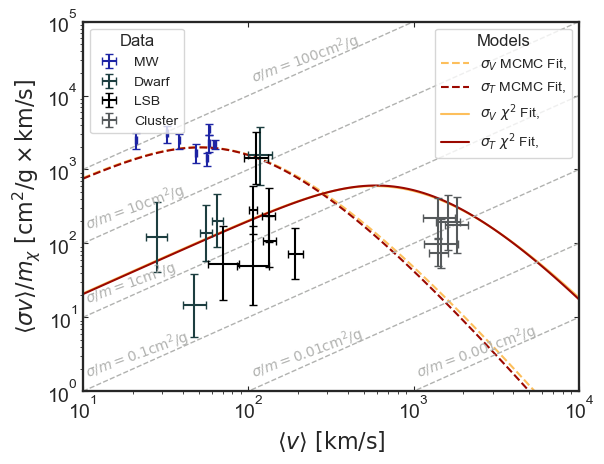

In [12]:
"""
//////////// Plots ////////////
"""

#for the plots
DwarfData = np.loadtxt('Data-Sets/DwarfDataPlot.csv', delimiter='\t')
Dwarf_x =     DwarfData[:,0]
Dwarf_y =     DwarfData[:,1]
Dwarf_Err_l = DwarfData[:,2]
Dwarf_Err_r = DwarfData[:,3]
Dwarf_Err_d = DwarfData[:,4]
Dwarf_Err_u = DwarfData[:,5]

GalaxyData = np.loadtxt('Data-Sets/GalaxyDataPlot.csv', delimiter='\t')
Galaxy_x = GalaxyData[:,0]
Galaxy_y = GalaxyData[:,1]
Galaxy_Err_l = GalaxyData[:,2]
Galaxy_Err_r = GalaxyData[:,3]
Galaxy_Err_d = GalaxyData[:,4]
Galaxy_Err_u = GalaxyData[:,5]

ClusterData = np.loadtxt('Data-Sets/ClusterDataPlot.csv', delimiter='\t')
Cluster_x = ClusterData[:,0]
Cluster_y = ClusterData[:,1]
Cluster_Err_l = ClusterData[:,2]
Cluster_Err_r = ClusterData[:,3]
Cluster_Err_d = ClusterData[:,4]
Cluster_Err_u = ClusterData[:,5]

v_array = np.logspace(1., 4, 100)
v0 = v_array*np.sqrt(np.pi)/4

sigvm_array_MCMC_v = np.zeros(100) #Array to plot viscosity with paramters from MCMC Fit
sigvm_array_MCMC_t = np.zeros(100) #Array to plot transfer with paramters from MCMC Fit
sigvm_array_chi2_v = np.zeros(100) #Array to plot viscosity with paramters from Chi2 Fit
sigvm_array_chi2_t = np.zeros(100) #Array to plot transfer with paramters from Chi2 Fit

M_mv, m_mv = 25.1, 209.6 # Z' and DM mass from MCMC fit to sigV, eq (19) 
M_mt, m_mt = 19.9, 161.5 # Z' and DM mass from MCMC fit to sigT, eq (20) 
M_cv, m_cv= 37.58, 27.70 #Z' and DM mass from chi2 fit to sigV, eq (21) 
M_ct, m_ct= 29.55, 20.75 #Z' and DM mass from chi2 fit to sigT, eq (22) 


# Create a figure and axis object
fig, ax = plt.subplots()


for i in range(100):
    sigvm_array_MCMC_v[i] = Average_sigmaviscosity(v0[i], M_mv, m_mv, alphaDM)
    sigvm_array_MCMC_t[i] = Average_sigmatransfer(v0[i], M_mt, m_mt, alphaDM)
    sigvm_array_chi2_v[i] = Average_sigmaviscosity(v0[i], M_cv, m_cv, alphaDM)
    sigvm_array_chi2_t[i] = Average_sigmatransfer(v0[i], M_ct, m_ct, alphaDM)

# Model Plot
model_MV, = ax.plot(v_array, sigvm_array_MCMC_v, color=BackgroundColor3, linestyle='dashed', label='$\sigma_V$ MCMC Fit,')
model_MT, = ax.plot(v_array, sigvm_array_MCMC_t, color=MainColor1,  linestyle='dashed', label='$\sigma_T$ MCMC Fit,')
model_CV, = ax.plot(v_array, sigvm_array_chi2_v, color=BackgroundColor3, linestyle='solid', label='$\sigma_V~ \chi^2$ Fit,')
model_CT, = ax.plot(v_array, sigvm_array_chi2_t, color=MainColor1, linestyle='solid', label='$\sigma_T~ \chi^2$ Fit,')
first_legend = ax.legend(handles=[model_MV, model_MT, model_CV, model_CT], loc=1, title='Models')
ax.add_artist(first_legend)


# Cross section diagonals
DiagonalsColor = Gray2
Diagonalswidth = 1
ax.plot(v_array, 0.001*v_array, color=DiagonalsColor, linestyle='dashed', lw=Diagonalswidth)
ax.text(1000, 1.5, r'$ \sigma/m = 0.001 \mathrm{cm^2/g}$', size=10, rotation=20, color=DiagonalsColor)
ax.plot(v_array, 0.01*v_array, color=DiagonalsColor, linestyle='dashed', lw=Diagonalswidth)
ax.text(100, 1.5, r'$ \sigma/m = 0.01 \mathrm{cm^2/g}$', size=10, rotation=20, color=DiagonalsColor)
ax.plot(v_array, 0.1*v_array, color=DiagonalsColor, linestyle='dashed', lw=Diagonalswidth)
ax.text(10, 1.5, r'$ \sigma/m = 0.1 \mathrm{cm^2/g}$', size=10, rotation=20, color=DiagonalsColor)
ax.plot(v_array, v_array, color=DiagonalsColor, linestyle='dashed', lw=Diagonalswidth)
ax.text(10, 15, r'$ \sigma/m = 1 \mathrm{cm^2/g}$', size=10, rotation=20, color=DiagonalsColor)
ax.plot(v_array, 10*v_array, color=DiagonalsColor, linestyle='dashed', lw=Diagonalswidth)
ax.text(10, 150, r'$ \sigma/m = 10\mathrm{cm^2/g}$', size=10, rotation=20, color=DiagonalsColor)
ax.plot(v_array, 100*v_array, color=DiagonalsColor, linestyle='dashed', lw=Diagonalswidth)
ax.text(100, 1.5e4, r'$ \sigma/m = 100 \mathrm{cm^2/g}$', size=10, rotation=20, color=DiagonalsColor)

# Data
data1 = ax.errorbar(VelocityData, CrossSectionData, CrossSectionData_Err , VelocityData_Err , ls='', color=MainColor2, capsize=3, label='MW')
data2 = ax.errorbar(Dwarf_x, Dwarf_y, (Dwarf_Err_d, Dwarf_Err_u), (Dwarf_Err_l, Dwarf_Err_r), ls='', color=BackgroundColor2, capsize=3, label='Dwarf')
data3 = ax.errorbar(Galaxy_x, Galaxy_y, (Galaxy_Err_d, Galaxy_Err_u), (Galaxy_Err_l, Galaxy_Err_r), ls='', color='k', capsize=3, label='LSB')
data4 = ax.errorbar(Cluster_x, Cluster_y, (Cluster_Err_d, Cluster_Err_u), (Cluster_Err_l, Cluster_Err_r), ls='', color=Gray1, capsize=3, label='Cluster')
ax.legend(handles=[data1, data2, data3, data4], loc=2, title='Data')


# Settings
ax.tick_params(top=True, right=True, direction='in')
ax.set_xlabel(r'$\langle v \rangle ~[ \mathrm{km/s}]$')
ax.set_ylabel(r'$\langle\sigma v \rangle /m_{\chi} ~[\mathrm{cm^2/g \times km/s}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1, 1e5)
ax.set_xlim(10, 1e4)


# Save and show the plot
plt.savefig('Plots/GalaxyFit.pdf')
plt.savefig('Plots/GalaxyFit.svg')
plt.show()